## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from svm_models import NaiveSVM, ProbSVM, KNNSVM, SKiP
from multi_svm import OneVsRestSVM

import warnings
warnings.filterwarnings("ignore")

## 2. Load and Prepare Wine Dataset

In [2]:
# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")


Dataset shape: (178, 13)
Number of classes: 3
Class distribution: [59 71 48]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 124
Test set size: 54


### 2.1 Generate Noisy Training Data

In [ ]:
from datasets import inject_noise

# Inject noise into training data
X_noisy_train, y_noisy_train = inject_noise(
    X_train, y_train,
    feature_noise=0.3, label_noise=0.3, add_label_noise=True, epsilon=1e-3,
    random_state=42
)

print(f"Original training set size: {len(y_train)}")
print(f"Noisy training set size: {len(y_noisy_train)}")
print(f"Added samples: {len(y_noisy_train) - len(y_train)}")

Original training set size: 124
Noisy training set size: 161
Added samples: 37


## 3. Train Models

### 3.1 prob-OvR SVM

In [5]:
C_values = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

In [6]:
clf_naive_ovr = None
train_acc_naive = 0
test_acc_naive = 0

for c in C_values:
    clf_naive = OneVsRestSVM(NaiveSVM(C=c, fit_intercept=True))
    clf_naive.fit(X_train, y_train)

    train_acc_naive_current = (clf_naive.predict(X_train) == y_train).mean()
    test_acc_naive_current = (clf_naive.predict(X_test) == y_test).mean()

    if test_acc_naive < test_acc_naive_current:
        test_acc_naive = test_acc_naive_current
        train_acc_naive = train_acc_naive_current
        clf_naive_ovr = clf_naive

print(f"Naive-OvR Train Accuracy: {train_acc_naive:.4f}")
print(f"Naive-OvR Test Accuracy: {test_acc_naive:.4f}")

print(clf_naive_ovr)

Naive-OvR Train Accuracy: 1.0000
Naive-OvR Test Accuracy: 0.9815
OneVsRestSVM(estimator=NaiveSVM())


### 3.2 Prob-OvR SVM

In [7]:
clf_prob_ovr = None
train_acc_prob = 0
test_acc_prob = 0

for c in C_values:
    clf_prob = OneVsRestSVM(ProbSVM(C=c, fit_intercept=True))
    clf_prob.fit(X_train, y_train)

    train_acc_prob_current = (clf_prob.predict(X_train) == y_train).mean()
    test_acc_prob_current = (clf_prob.predict(X_test) == y_test).mean()

    if test_acc_prob < test_acc_prob_current:
        test_acc_prob = test_acc_prob_current
        train_acc_prob = train_acc_prob_current
        clf_prob_ovr = clf_prob

print(f"Prob-OvR Train Accuracy: {train_acc_prob:.4f}")
print(f"Prob-OvR Test Accuracy: {test_acc_prob:.4f}")

Prob-OvR Train Accuracy: 0.9758
Prob-OvR Test Accuracy: 0.9815


### 3.3 KNN-OvR SVM

In [8]:
clf_knn_ovr = None
train_acc_knn = 0
test_acc_knn = 0

for c in C_values:
    clf_knn = OneVsRestSVM(KNNSVM(C=c, fit_intercept=True, k=5))
    clf_knn.fit(X_train, y_train)

    train_acc_knn_current = (clf_knn.predict(X_train) == y_train).mean()
    test_acc_knn_current = (clf_knn.predict(X_test) == y_test).mean()

    if test_acc_knn < test_acc_knn_current:
        test_acc_knn = test_acc_knn_current
        train_acc_knn = train_acc_knn_current
        clf_knn_ovr = clf_knn

print(f"knn-OvR Train Accuracy: {train_acc_knn:.4f}")
print(f"knn-OvR Test Accuracy: {test_acc_knn:.4f}")

knn-OvR Train Accuracy: 1.0000
knn-OvR Test Accuracy: 0.9815


### 3.4 SKiP-OvR SVM

In [9]:
clf_skip_ovr = None
train_acc_skip = 0
test_acc_skip = 0

for c in C_values:
    clf_skip = OneVsRestSVM(SKiP(C=c, fit_intercept=True, k=5))
    clf_skip.fit(X_train, y_train)

    train_acc_skip_current = (clf_skip.predict(X_train) == y_train).mean()
    test_acc_skip_current = (clf_skip.predict(X_test) == y_test).mean()

    if test_acc_skip < test_acc_skip_current:
        test_acc_skip = test_acc_skip_current
        train_acc_skip = train_acc_skip_current
        clf_skip_ovr = clf_skip

print(f"skip-OvR Train Accuracy: {train_acc_skip:.4f}")
print(f"skip-OvR Test Accuracy: {test_acc_skip:.4f}")

skip-OvR Train Accuracy: 0.9919
skip-OvR Test Accuracy: 0.9815


### 3.5 Baseline: sklearn SVC (RBF kernel)

In [10]:
clf_sklearn = SVC(kernel='rbf', C=1.0, gamma='scale')
clf_sklearn.fit(X_train, y_train)

train_acc_sklearn = clf_sklearn.score(X_train, y_train)
test_acc_sklearn = clf_sklearn.score(X_test, y_test)

print(f"sklearn SVC (RBF) Train Accuracy: {train_acc_sklearn:.4f}")
print(f"sklearn SVC (RBF) Test Accuracy: {test_acc_sklearn:.4f}")

sklearn SVC (RBF) Train Accuracy: 1.0000
sklearn SVC (RBF) Test Accuracy: 0.9815


In [11]:
clf_sklearn_noisy = SVC(kernel='rbf', C=1.0, gamma='scale')
clf_sklearn_noisy.fit(X_noisy_train, y_noisy_train)

train_acc_sklearn_noisy = clf_sklearn_noisy.score(X_noisy_train, y_noisy_train)
test_acc_sklearn_noisy = clf_sklearn_noisy.score(X_test, y_test)

print(f"sklearn SVC (RBF, Noisy) Train Accuracy: {train_acc_sklearn_noisy:.4f}")
print(f"sklearn SVC (RBF, Noisy) Test Accuracy: {test_acc_sklearn_noisy:.4f}")

sklearn SVC (RBF, Noisy) Train Accuracy: 0.7888
sklearn SVC (RBF, Noisy) Test Accuracy: 1.0000


In [12]:
clf_skip_ovr_noisy = None
train_acc_skip_noisy = 0
test_acc_skip_noisy = 0

for c in C_values:
    clf_skip_noisy = OneVsRestSVM(SKiP(C=c, fit_intercept=True, k=5))
    clf_skip_noisy.fit(X_noisy_train, y_noisy_train)

    train_acc_skip_noisy_current = (clf_skip_noisy.predict(X_noisy_train) == y_noisy_train).mean()
    test_acc_skip_noisy_current = (clf_skip_noisy.predict(X_test) == y_test).mean()

    if test_acc_skip_noisy < test_acc_skip_noisy_current:
        test_acc_skip_noisy = test_acc_skip_noisy_current
        train_acc_skip_noisy = train_acc_skip_noisy_current
        clf_skip_ovr_noisy = clf_skip_noisy

print(f"SKiP-OvR (Noisy) Train Accuracy: {train_acc_skip_noisy:.4f}")
print(f"SKiP-OvR (Noisy) Test Accuracy: {test_acc_skip_noisy:.4f}")

SKiP-OvR (Noisy) Train Accuracy: 0.7267
SKiP-OvR (Noisy) Test Accuracy: 0.9630


In [13]:
clf_knn_ovr_noisy = None
train_acc_knn_noisy = 0
test_acc_knn_noisy = 0

for c in C_values:
    clf_knn_noisy = OneVsRestSVM(KNNSVM(C=c, fit_intercept=True, k=5))
    clf_knn_noisy.fit(X_noisy_train, y_noisy_train)

    train_acc_knn_noisy_current = (clf_knn_noisy.predict(X_noisy_train) == y_noisy_train).mean()
    test_acc_knn_noisy_current = (clf_knn_noisy.predict(X_test) == y_test).mean()

    if test_acc_knn_noisy < test_acc_knn_noisy_current:
        test_acc_knn_noisy = test_acc_knn_noisy_current
        train_acc_knn_noisy = train_acc_knn_noisy_current
        clf_knn_ovr_noisy = clf_knn_noisy

print(f"KNN-OvR (Noisy) Train Accuracy: {train_acc_knn_noisy:.4f}")
print(f"KNN-OvR (Noisy) Test Accuracy: {test_acc_knn_noisy:.4f}")



KNN-OvR (Noisy) Train Accuracy: 0.7516
KNN-OvR (Noisy) Test Accuracy: 0.9815


In [14]:
clf_prob_ovr_noisy = None
train_acc_prob_noisy = 0
test_acc_prob_noisy = 0

for c in C_values:
    clf_prob_noisy = OneVsRestSVM(ProbSVM(C=c, fit_intercept=True))
    clf_prob_noisy.fit(X_noisy_train, y_noisy_train)

    train_acc_prob_noisy_current = (clf_prob_noisy.predict(X_noisy_train) == y_noisy_train).mean()
    test_acc_prob_noisy_current = (clf_prob_noisy.predict(X_test) == y_test).mean()

    if test_acc_prob_noisy < test_acc_prob_noisy_current:
        test_acc_prob_noisy = test_acc_prob_noisy_current
        train_acc_prob_noisy = train_acc_prob_noisy_current
        clf_prob_ovr_noisy = clf_prob_noisy

print(f"Prob-OvR (Noisy) Train Accuracy: {train_acc_prob_noisy:.4f}")
print(f"Prob-OvR (Noisy) Test Accuracy: {test_acc_prob_noisy:.4f}")



Prob-OvR (Noisy) Train Accuracy: 0.7453
Prob-OvR (Noisy) Test Accuracy: 0.9630


In [15]:
clf_naive_ovr_noisy = None
train_acc_naive_noisy = 0
test_acc_naive_noisy = 0

for c in C_values:
    clf_naive_noisy = OneVsRestSVM(NaiveSVM(C=c, fit_intercept=True))
    clf_naive_noisy.fit(X_noisy_train, y_noisy_train)

    train_acc_naive_noisy_current = (clf_naive_noisy.predict(X_noisy_train) == y_noisy_train).mean()
    test_acc_naive_noisy_current = (clf_naive_noisy.predict(X_test) == y_test).mean()

    if test_acc_naive_noisy < test_acc_naive_noisy_current:
        test_acc_naive_noisy = test_acc_naive_noisy_current
        train_acc_naive_noisy = train_acc_naive_noisy_current
        clf_naive_ovr_noisy = clf_naive_noisy

print(f"Naive-OvR (Noisy) Train Accuracy: {train_acc_naive_noisy:.4f}")
print(f"Naive-OvR (Noisy) Test Accuracy: {test_acc_naive_noisy:.4f}")



Naive-OvR (Noisy) Train Accuracy: 0.7640
Naive-OvR (Noisy) Test Accuracy: 0.9630


## 4. Results Summary

In [16]:
# Create comprehensive results table
results_clean = pd.DataFrame({
    'Model': ['Naive-OvR', 'Prob-OvR', 'KNN-OvR', 'SKiP-OvR', 'sklearn SVC (RBF)'],
    'Train Accuracy': [
        train_acc_naive,
        train_acc_prob,
        train_acc_knn,
        train_acc_skip,
        train_acc_sklearn
    ],
    'Test Accuracy': [
        test_acc_naive,
        test_acc_prob,
        test_acc_knn,
        test_acc_skip,
        test_acc_sklearn
    ]
})

results_noisy = pd.DataFrame({
    'Model': ['Naive-OvR', 'Prob-OvR', 'KNN-OvR', 'SKiP-OvR', 'sklearn SVC (RBF)'],
    'Train Accuracy': [
        train_acc_naive_noisy,
        train_acc_prob_noisy,
        train_acc_knn_noisy,
        train_acc_skip_noisy,
        train_acc_sklearn_noisy
    ],
    'Test Accuracy': [
        test_acc_naive_noisy,
        test_acc_prob_noisy,
        test_acc_knn_noisy,
        test_acc_skip_noisy,
        test_acc_sklearn_noisy
    ]
})

print("=" * 60)
print("CLEAN DATA PERFORMANCE")
print("=" * 60)
print(results_clean.to_string(index=False))
print("\n" + "=" * 60)
print("NOISY DATA PERFORMANCE")
print("=" * 60)
print(results_noisy.to_string(index=False))

CLEAN DATA PERFORMANCE
            Model  Train Accuracy  Test Accuracy
        Naive-OvR        1.000000       0.981481
         Prob-OvR        0.975806       0.981481
          KNN-OvR        1.000000       0.981481
         SKiP-OvR        0.991935       0.981481
sklearn SVC (RBF)        1.000000       0.981481

NOISY DATA PERFORMANCE
            Model  Train Accuracy  Test Accuracy
        Naive-OvR        0.763975       0.962963
         Prob-OvR        0.745342       0.962963
          KNN-OvR        0.751553       0.981481
         SKiP-OvR        0.726708       0.962963
sklearn SVC (RBF)        0.788820       1.000000


### 4.1 Performance Degradation Analysis

In [17]:
# Calculate performance degradation
degradation = pd.DataFrame({
    'Model': ['Naive-OvR', 'Prob-OvR', 'KNN-OvR', 'SKiP-OvR', 'sklearn SVC (RBF)'],
    'Clean Test Acc': [test_acc_naive, test_acc_prob, test_acc_knn, test_acc_skip, test_acc_sklearn],
    'Noisy Test Acc': [test_acc_naive_noisy, test_acc_prob_noisy, test_acc_knn_noisy, test_acc_skip_noisy, test_acc_sklearn_noisy],
    'Degradation': [
        test_acc_naive - test_acc_naive_noisy,
        test_acc_prob - test_acc_prob_noisy,
        test_acc_knn - test_acc_knn_noisy,
        test_acc_skip - test_acc_skip_noisy,
        test_acc_sklearn - test_acc_sklearn_noisy
    ]
})

print("\n" + "=" * 60)
print("PERFORMANCE DEGRADATION (Clean → Noisy)")
print("=" * 60)
print(degradation.to_string(index=False))
print("\nBest robustness (lowest degradation): " + degradation.loc[degradation['Degradation'].idxmin(), 'Model'])


PERFORMANCE DEGRADATION (Clean → Noisy)
            Model  Clean Test Acc  Noisy Test Acc  Degradation
        Naive-OvR        0.981481        0.962963     0.018519
         Prob-OvR        0.981481        0.962963     0.018519
          KNN-OvR        0.981481        0.981481     0.000000
         SKiP-OvR        0.981481        0.962963     0.018519
sklearn SVC (RBF)        0.981481        1.000000    -0.018519

Best robustness (lowest degradation): sklearn SVC (RBF)


## 5. Visualization

### 5.1 Clean vs Noisy Performance Comparison

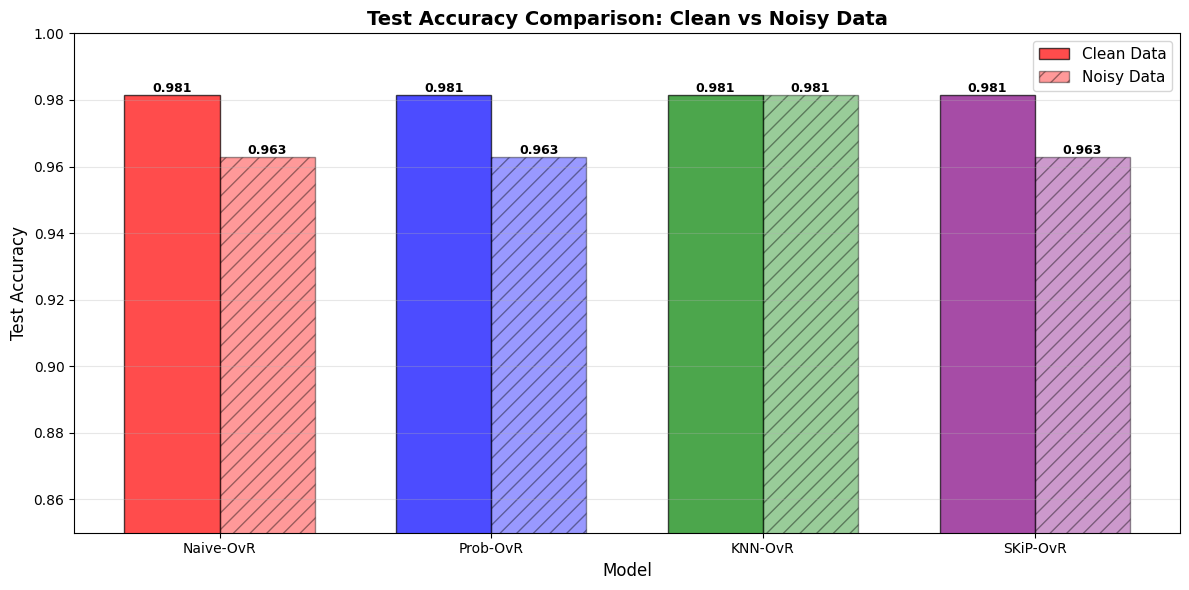

In [18]:
# Side-by-side comparison: Clean vs Noisy
models_ovr = ['Naive-OvR', 'Prob-OvR', 'KNN-OvR', 'SKiP-OvR']
test_accs_clean = [test_acc_naive, test_acc_prob, test_acc_knn, test_acc_skip]
test_accs_noisy = [test_acc_naive_noisy, test_acc_prob_noisy, test_acc_knn_noisy, test_acc_skip_noisy]

x = np.arange(len(models_ovr))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, test_accs_clean, width, label='Clean Data', 
               color=['red', 'blue', 'green', 'purple'], alpha=0.7, edgecolor='black')
bars2 = ax.bar(x + width/2, test_accs_noisy, width, label='Noisy Data',
               color=['red', 'blue', 'green', 'purple'], alpha=0.4, edgecolor='black', hatch='//')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel('Model', fontsize=12)
ax.set_title('Test Accuracy Comparison: Clean vs Noisy Data', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_ovr)
ax.legend(fontsize=11)
ax.set_ylim([0.85, 1.0])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 5.2 Confusion Matrices on Noisy Data

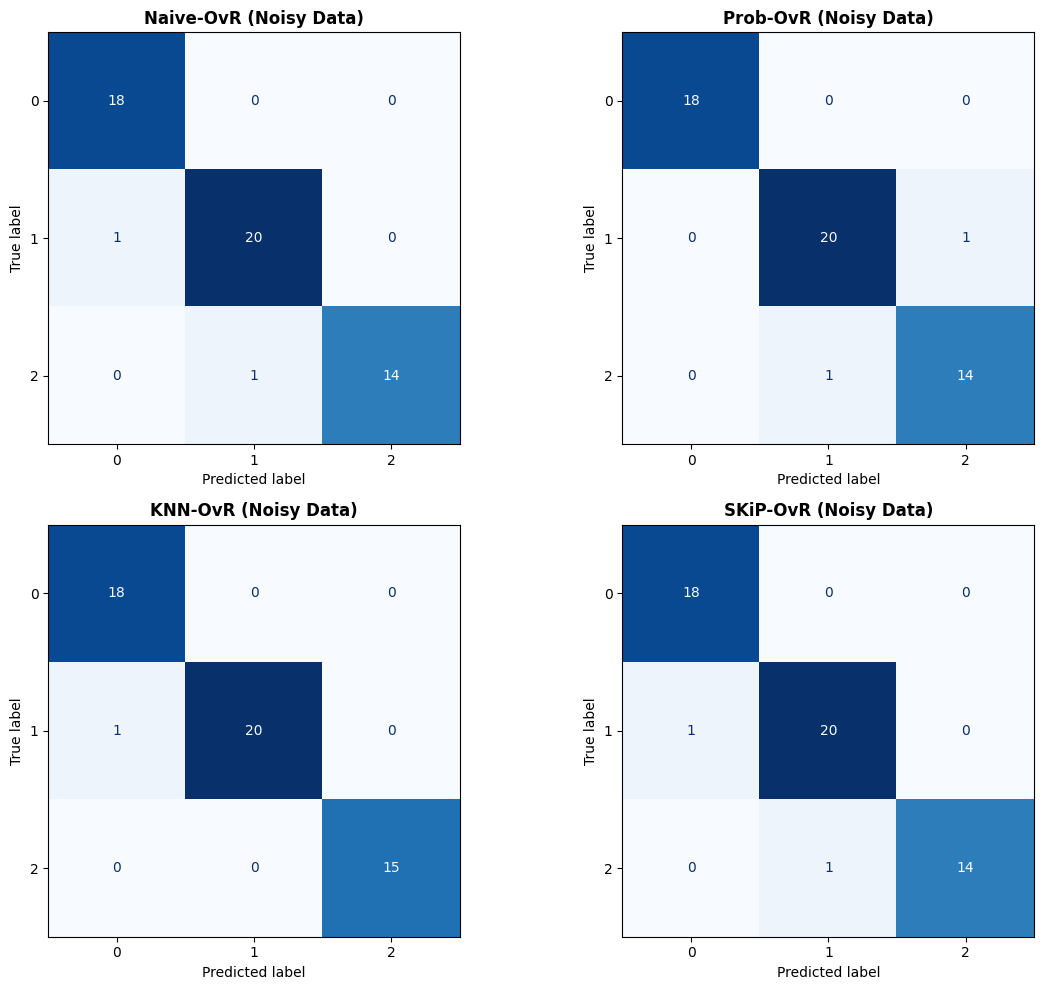

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for all OvR models on noisy data
models_for_cm = [
    ("Naive-OvR", clf_naive_ovr_noisy),
    ("Prob-OvR", clf_prob_ovr_noisy),
    ("KNN-OvR", clf_knn_ovr_noisy),
    ("SKiP-OvR", clf_skip_ovr_noisy)
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, clf) in enumerate(models_for_cm):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'{name} (Noisy Data)', fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

[f_noise=0.0, l_noise=0.0] Naive(bestC)=0.981, Prob(bestC)=0.981, KNN(bestC)=0.981, SKiP(bestC)=0.981
[f_noise=0.0, l_noise=0.1] Naive(bestC)=0.926, Prob(bestC)=0.963, KNN(bestC)=0.963, SKiP(bestC)=0.963
[f_noise=0.0, l_noise=0.2] Naive(bestC)=0.963, Prob(bestC)=0.981, KNN(bestC)=0.944, SKiP(bestC)=0.981
[f_noise=0.0, l_noise=0.3] Naive(bestC)=0.944, Prob(bestC)=0.981, KNN(bestC)=0.981, SKiP(bestC)=0.963
[f_noise=0.2, l_noise=0.0] Naive(bestC)=0.981, Prob(bestC)=0.981, KNN(bestC)=0.981, SKiP(bestC)=0.981
[f_noise=0.2, l_noise=0.1] Naive(bestC)=0.963, Prob(bestC)=0.963, KNN(bestC)=0.981, SKiP(bestC)=0.963
[f_noise=0.2, l_noise=0.2] Naive(bestC)=0.889, Prob(bestC)=0.981, KNN(bestC)=0.926, SKiP(bestC)=0.963
[f_noise=0.2, l_noise=0.3] Naive(bestC)=0.981, Prob(bestC)=0.981, KNN(bestC)=0.981, SKiP(bestC)=1.000
[f_noise=0.4, l_noise=0.0] Naive(bestC)=0.981, Prob(bestC)=0.963, KNN(bestC)=0.963, SKiP(bestC)=0.963
[f_noise=0.4, l_noise=0.1] Naive(bestC)=0.963, Prob(bestC)=0.944, KNN(bestC)=0.981

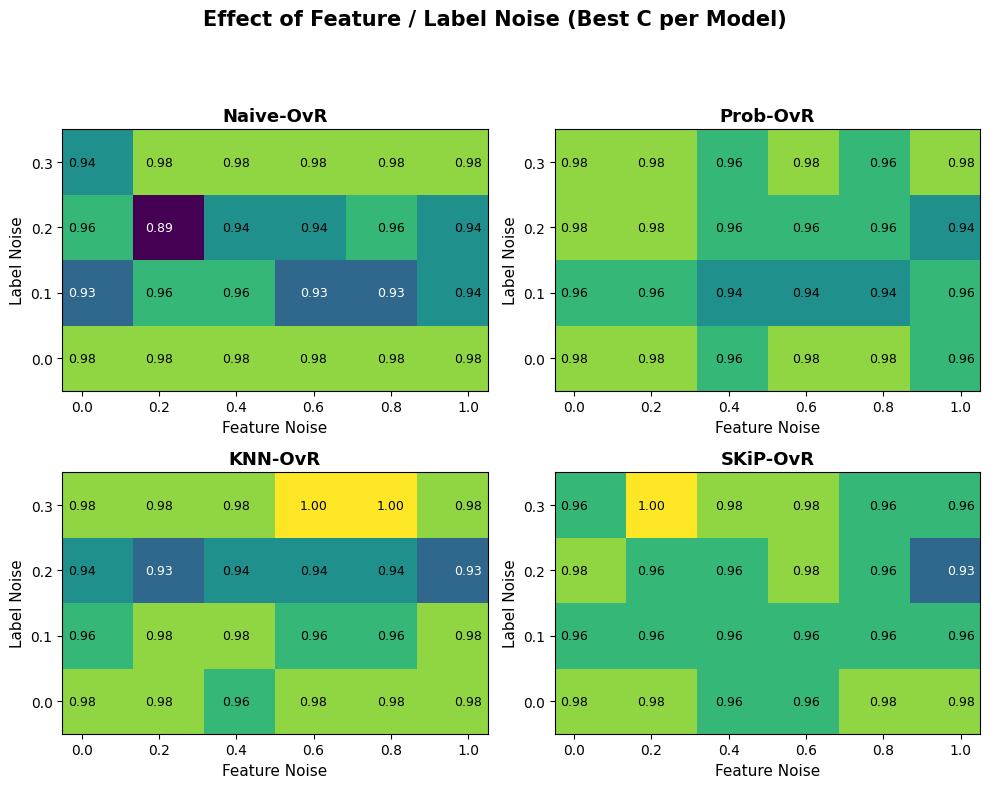

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import inject_noise

C_values = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

feature_noise_levels = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
label_noise_levels = [0.0, 0.1, 0.2, 0.3]

feature_n_levels = len(feature_noise_levels)
label_n_levels = len(label_noise_levels)

results = {
    'Naive-OvR': np.zeros((label_n_levels, feature_n_levels)),
    'Prob-OvR':  np.zeros((label_n_levels, feature_n_levels)),
    'KNN-OvR':   np.zeros((label_n_levels, feature_n_levels)),
    'SKiP-OvR':  np.zeros((label_n_levels, feature_n_levels)),
}

for fi, f_noise in enumerate(feature_noise_levels):
    for lj, l_noise in enumerate(label_noise_levels):
        X_noisy_train, y_noisy_train = inject_noise(
            X_train, y_train,
            feature_noise=f_noise,
            label_noise=l_noise,
            random_state=42
        )

        best_acc_naive = 0.0
        for C in C_values:
            clf_naive = OneVsRestSVM(NaiveSVM(C=C, fit_intercept=True))
            clf_naive.fit(X_noisy_train, y_noisy_train)
            acc = (clf_naive.predict(X_test) == y_test).mean()
            if acc > best_acc_naive:
                best_acc_naive = acc
        results['Naive-OvR'][lj, fi] = best_acc_naive

        best_acc_prob = 0.0
        for C in C_values:
            clf_prob = OneVsRestSVM(ProbSVM(C=C, fit_intercept=True))
            clf_prob.fit(X_noisy_train, y_noisy_train)
            acc = (clf_prob.predict(X_test) == y_test).mean()
            if acc > best_acc_prob:
                best_acc_prob = acc
        results['Prob-OvR'][lj, fi] = best_acc_prob

        best_acc_knn = 0.0
        for C in C_values:
            clf_knn = OneVsRestSVM(KNNSVM(C=C, k=5))
            clf_knn.fit(X_noisy_train, y_noisy_train)
            acc = (clf_knn.predict(X_test) == y_test).mean()
            if acc > best_acc_knn:
                best_acc_knn = acc
        results['KNN-OvR'][lj, fi] = best_acc_knn

        best_acc_skip = 0.0
        for C in C_values:
            clf_skip = OneVsRestSVM(SKiP(C=C, fit_intercept=True, k=5))
            clf_skip.fit(X_noisy_train, y_noisy_train)
            acc = (clf_skip.predict(X_test) == y_test).mean()
            if acc > best_acc_skip:
                best_acc_skip = acc
        results['SKiP-OvR'][lj, fi] = best_acc_skip

        print(
            f"[f_noise={f_noise:.1f}, l_noise={l_noise:.1f}] "
            f"Naive(bestC)={best_acc_naive:.3f}, "
            f"Prob(bestC)={best_acc_prob:.3f}, "
            f"KNN(bestC)={best_acc_knn:.3f}, "
            f"SKiP(bestC)={best_acc_skip:.3f}"
        )

# Heatmap plotting

models_ovr = ['Naive-OvR', 'Prob-OvR', 'KNN-OvR', 'SKiP-OvR']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

vmin = min(mat.min() for mat in results.values())
vmax = max(mat.max() for mat in results.values())
mid = (vmin + vmax) / 2

for idx, model_name in enumerate(models_ovr):
    ax = axes[idx]
    acc_matrix = results[model_name]   # shape: (label_n_levels, feature_n_levels)
    
    # x: feature noise, y: label noise
    im = ax.imshow(
        acc_matrix,
        origin='lower',
        vmin=vmin,
        vmax=vmax,
        extent=[
            feature_noise_levels[0] - 0.05,
            feature_noise_levels[-1] + 0.05,
            label_noise_levels[0] - 0.05,
            label_noise_levels[-1] + 0.05
        ],
        aspect='auto'
    )

    ax.set_title(f"{model_name}", fontsize=13, fontweight='bold')
    ax.set_xlabel("Feature Noise", fontsize=11)
    ax.set_ylabel("Label Noise", fontsize=11)

    ax.set_xticks(feature_noise_levels)
    ax.set_yticks(label_noise_levels)

    for lj, l_noise in enumerate(label_noise_levels):
        for fi, f_noise in enumerate(feature_noise_levels):
            acc = acc_matrix[lj, fi]
            ax.text(
                f_noise, l_noise, f"{acc:.2f}",
                ha='center', va='center',
                fontsize=9,
                color='white' if acc < mid else 'black'
            )

plt.suptitle(
    "Effect of Feature / Label Noise (Best C per Model)",
    fontsize=15, fontweight='bold'
)
plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.savefig("Noise_experiment.png", dpi=300)
plt.show()


## 7. Additional Analysis

### 7.1 Hyperparameter Tuning: C Value Comparison


HYPERPARAMETER TUNING: C VALUE COMPARISON (Noisy Data)
C           0.1       1.0       10.0      100.0     1000.0    10000.0
Model                                                                
KNN-OvR    0.981481  0.962963  0.962963  0.925926  0.851852  0.740741
Naive-OvR  0.962963  0.962963  0.962963  0.981481  0.833333  0.870370
Prob-OvR   0.888889  0.962963  0.962963  0.981481  0.944444  0.944444
SKiP-OvR   0.814815  0.962963  0.962963  0.925926  0.944444  0.907407


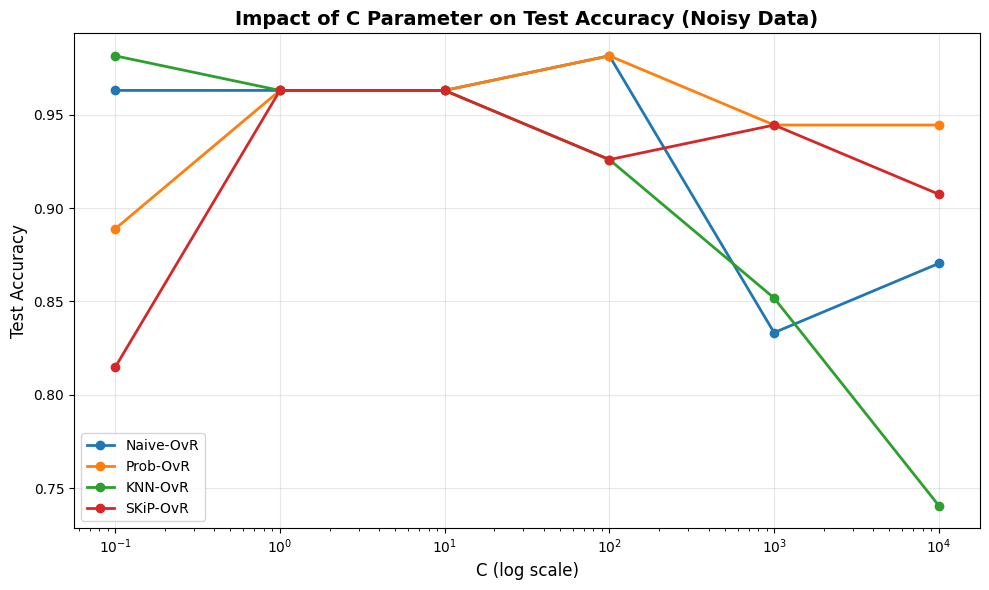

In [21]:
# Compare different C values on noisy data
C_values = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
models_to_test = {
    'Naive-OvR': NaiveSVM,
    'Prob-OvR': ProbSVM,
    'KNN-OvR': KNNSVM,
    'SKiP-OvR': SKiP
}

c_results = []

for model_name, ModelClass in models_to_test.items():
    for C in C_values:
        if model_name in ['KNN-OvR', 'SKiP-OvR']:
            base_model = ModelClass(C=C, fit_intercept=True, k=5)
        else:
            base_model = ModelClass(C=C, fit_intercept=True)
        
        clf = OneVsRestSVM(base_model)
        clf.fit(X_noisy_train, y_noisy_train)
        test_acc = (clf.predict(X_test) == y_test).mean()
        
        c_results.append({
            'Model': model_name,
            'C': C,
            'Test Accuracy': test_acc
        })

c_df = pd.DataFrame(c_results)
c_pivot = c_df.pivot(index='Model', columns='C', values='Test Accuracy')

print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING: C VALUE COMPARISON (Noisy Data)")
print("=" * 60)
print(c_pivot.to_string())

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
for model in models_to_test.keys():
    model_data = c_df[c_df['Model'] == model]
    ax.plot(model_data['C'], model_data['Test Accuracy'], marker='o', label=model, linewidth=2)

ax.set_xscale('log')
ax.set_xlabel('C (log scale)', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
ax.set_title('Impact of C Parameter on Test Accuracy (Noisy Data)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 7.2 Hyperparameter Tuning: k Value Comparison (KNN/SKiP)


HYPERPARAMETER TUNING: k VALUE COMPARISON (Noisy Data)
k               3         5         7         10        15
Model                                                     
KNN-OvR   0.962963  0.962963  0.962963  0.962963  0.962963
SKiP-OvR  0.962963  0.962963  0.962963  0.962963  0.962963


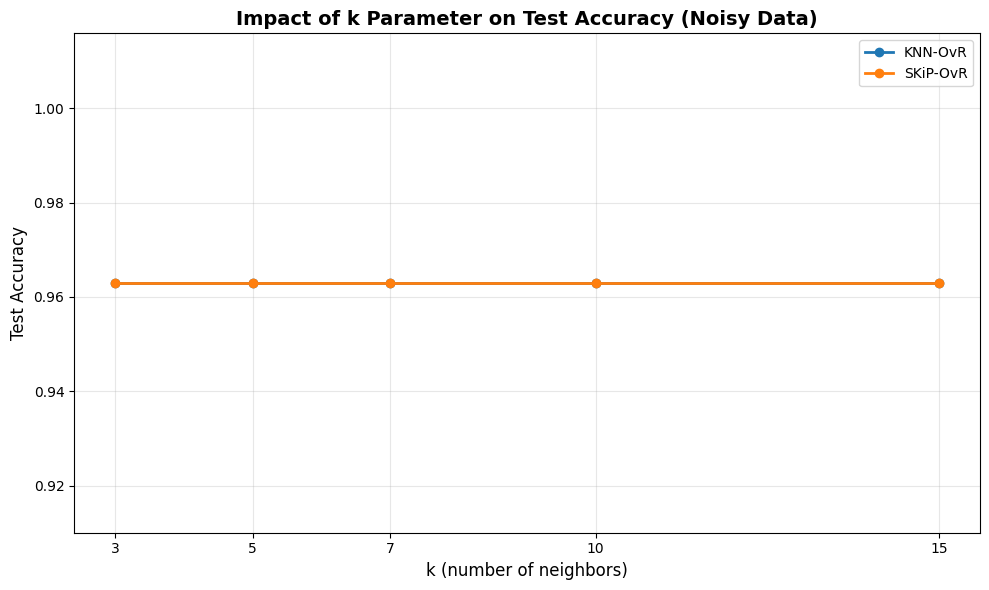

In [22]:
# Compare different k values for KNN and SKiP on noisy data
k_values = [3, 5, 7, 10, 15]
k_results = []

for k in k_values:
    # KNN-OvR
    clf_knn = OneVsRestSVM(KNNSVM(C=1.0, fit_intercept=True, k=k))
    clf_knn.fit(X_noisy_train, y_noisy_train)
    test_acc_knn = (clf_knn.predict(X_test) == y_test).mean()
    k_results.append({'Model': 'KNN-OvR', 'k': k, 'Test Accuracy': test_acc_knn})
    
    # SKiP-OvR
    clf_skip = OneVsRestSVM(SKiP(C=1.0, fit_intercept=True, k=k))
    clf_skip.fit(X_noisy_train, y_noisy_train)
    test_acc_skip = (clf_skip.predict(X_test) == y_test).mean()
    k_results.append({'Model': 'SKiP-OvR', 'k': k, 'Test Accuracy': test_acc_skip})

k_df = pd.DataFrame(k_results)
k_pivot = k_df.pivot(index='Model', columns='k', values='Test Accuracy')

print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING: k VALUE COMPARISON (Noisy Data)")
print("=" * 60)
print(k_pivot.to_string())

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
for model in ['KNN-OvR', 'SKiP-OvR']:
    model_data = k_df[k_df['Model'] == model]
    ax.plot(model_data['k'], model_data['Test Accuracy'], marker='o', label=model, linewidth=2)

ax.set_xlabel('k (number of neighbors)', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
ax.set_title('Impact of k Parameter on Test Accuracy (Noisy Data)', fontsize=14, fontweight='bold')
ax.set_xticks(k_values)
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 7.3 Comparison with sklearn OneVsRestClassifier

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# sklearn's OneVsRestClassifier with LinearSVC
clf_sklearn_ovr = OneVsRestClassifier(LinearSVC(C=1.0, max_iter=10000))
clf_sklearn_ovr.fit(X_train, y_train)
test_acc_sklearn_ovr_clean = clf_sklearn_ovr.score(X_test, y_test)

clf_sklearn_ovr_noisy = OneVsRestClassifier(LinearSVC(C=1.0, max_iter=10000))
clf_sklearn_ovr_noisy.fit(X_noisy_train, y_noisy_train)
test_acc_sklearn_ovr_noisy = clf_sklearn_ovr_noisy.score(X_test, y_test)

print("\n" + "=" * 60)
print("SKLEARN OVR COMPARISON")
print("=" * 60)
print(f"sklearn OneVsRestClassifier + LinearSVC (Clean):  {test_acc_sklearn_ovr_clean:.4f}")
print(f"sklearn OneVsRestClassifier + LinearSVC (Noisy):  {test_acc_sklearn_ovr_noisy:.4f}")
print(f"Degradation: {test_acc_sklearn_ovr_clean - test_acc_sklearn_ovr_noisy:.4f}")
print("\nComparison with our implementations:")
print(f"  Our Naive-OvR (Clean):  {test_acc_naive:.4f}")
print(f"  Our Naive-OvR (Noisy):  {test_acc_naive_noisy:.4f}")
print(f"  Our SKiP-OvR (Clean):   {test_acc_skip:.4f}")
print(f"  Our SKiP-OvR (Noisy):   {test_acc_skip_noisy:.4f}")


SKLEARN OVR COMPARISON
sklearn OneVsRestClassifier + LinearSVC (Clean):  0.9815
sklearn OneVsRestClassifier + LinearSVC (Noisy):  0.9815
Degradation: 0.0000

Comparison with our implementations:
  Our Naive-OvR (Clean):  0.9815
  Our Naive-OvR (Noisy):  0.9630
  Our SKiP-OvR (Clean):   0.9630
  Our SKiP-OvR (Noisy):   0.9630


### 7.4 Support Vector Analysis

Naive-OvR Clean
Prob-OvR Clean
KNN-OvR Noisy
SKiP-OvR Clean
Naive-OvR Noisy
Prob-OvR Noisy
KNN-OvR Clean
SKiP-OvR Noisy

SUPPORT VECTOR ANALYSIS

Naive-OvR Clean:
  Total SVs: 34
  Mean SVs per classifier: 11.3
  Per-class breakdown: [10 14 10]

Prob-OvR Clean:
  Total SVs: 138
  Mean SVs per classifier: 46.0
  Per-class breakdown: [60 41 37]

KNN-OvR Noisy:
  Total SVs: 156
  Mean SVs per classifier: 52.0
  Per-class breakdown: [55 56 45]

SKiP-OvR Clean:
  Total SVs: 46
  Mean SVs per classifier: 15.3
  Per-class breakdown: [16 15 15]

Naive-OvR Noisy:
  Total SVs: 227
  Mean SVs per classifier: 75.7
  Per-class breakdown: [72 82 73]

Prob-OvR Noisy:
  Total SVs: 182
  Mean SVs per classifier: 60.7
  Per-class breakdown: [75 62 45]

KNN-OvR Clean:
  Total SVs: 38
  Mean SVs per classifier: 12.7
  Per-class breakdown: [11 16 11]

SKiP-OvR Noisy:
  Total SVs: 136
  Mean SVs per classifier: 45.3
  Per-class breakdown: [59 44 33]


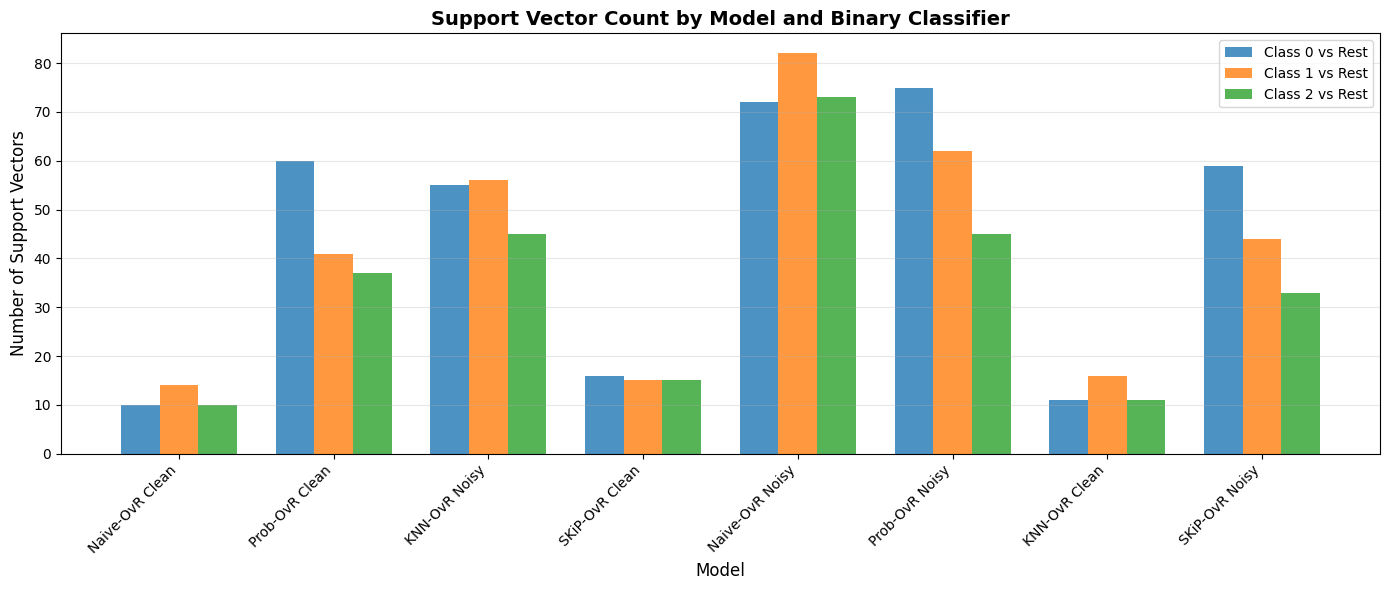

In [24]:
# Analyze support vectors for each binary classifier
sv_analysis = []

models_for_sv = [
    ('Naive-OvR Clean', clf_naive_ovr),
    ('Prob-OvR Clean', clf_prob_ovr),
    ('KNN-OvR Noisy', clf_knn_ovr_noisy),
    ('SKiP-OvR Clean', clf_skip_ovr),
    ('Naive-OvR Noisy', clf_naive_ovr_noisy),
    ('Prob-OvR Noisy', clf_prob_ovr_noisy),
    ('KNN-OvR Clean', clf_knn_ovr),
    ('SKiP-OvR Noisy', clf_skip_ovr_noisy)
]

for name, clf in models_for_sv:
    print(name)
    n_estimators = len(clf.estimators_)
    for i, estimator in enumerate(clf.estimators_):
        n_sv = len(estimator.support_)
        sv_analysis.append({
            'Model': name,
            'Binary Classifier': f'Class {i} vs Rest',
            'Num Support Vectors': n_sv
        })

sv_df = pd.DataFrame(sv_analysis)

print("\n" + "=" * 60)
print("SUPPORT VECTOR ANALYSIS")
print("=" * 60)

# Summary statistics
for model_name in sv_df['Model'].unique():
    model_sv = sv_df[sv_df['Model'] == model_name]['Num Support Vectors']
    print(f"\n{model_name}:")
    print(f"  Total SVs: {model_sv.sum()}")
    print(f"  Mean SVs per classifier: {model_sv.mean():.1f}")
    print(f"  Per-class breakdown: {model_sv.values}")

# Visualize
fig, ax = plt.subplots(figsize=(14, 6))
model_names = sv_df['Model'].unique()
x = np.arange(len(model_names))
width = 0.25

for i in range(3):  # 3 binary classifiers
    class_data = []
    for model in model_names:
        sv_count = sv_df[(sv_df['Model'] == model) & 
                         (sv_df['Binary Classifier'] == f'Class {i} vs Rest')]['Num Support Vectors'].values[0]
        class_data.append(sv_count)
    
    ax.bar(x + i*width, class_data, width, label=f'Class {i} vs Rest', alpha=0.8)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Number of Support Vectors', fontsize=12)
ax.set_title('Support Vector Count by Model and Binary Classifier', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 7.5 2D PCA Visualization with Decision Boundaries

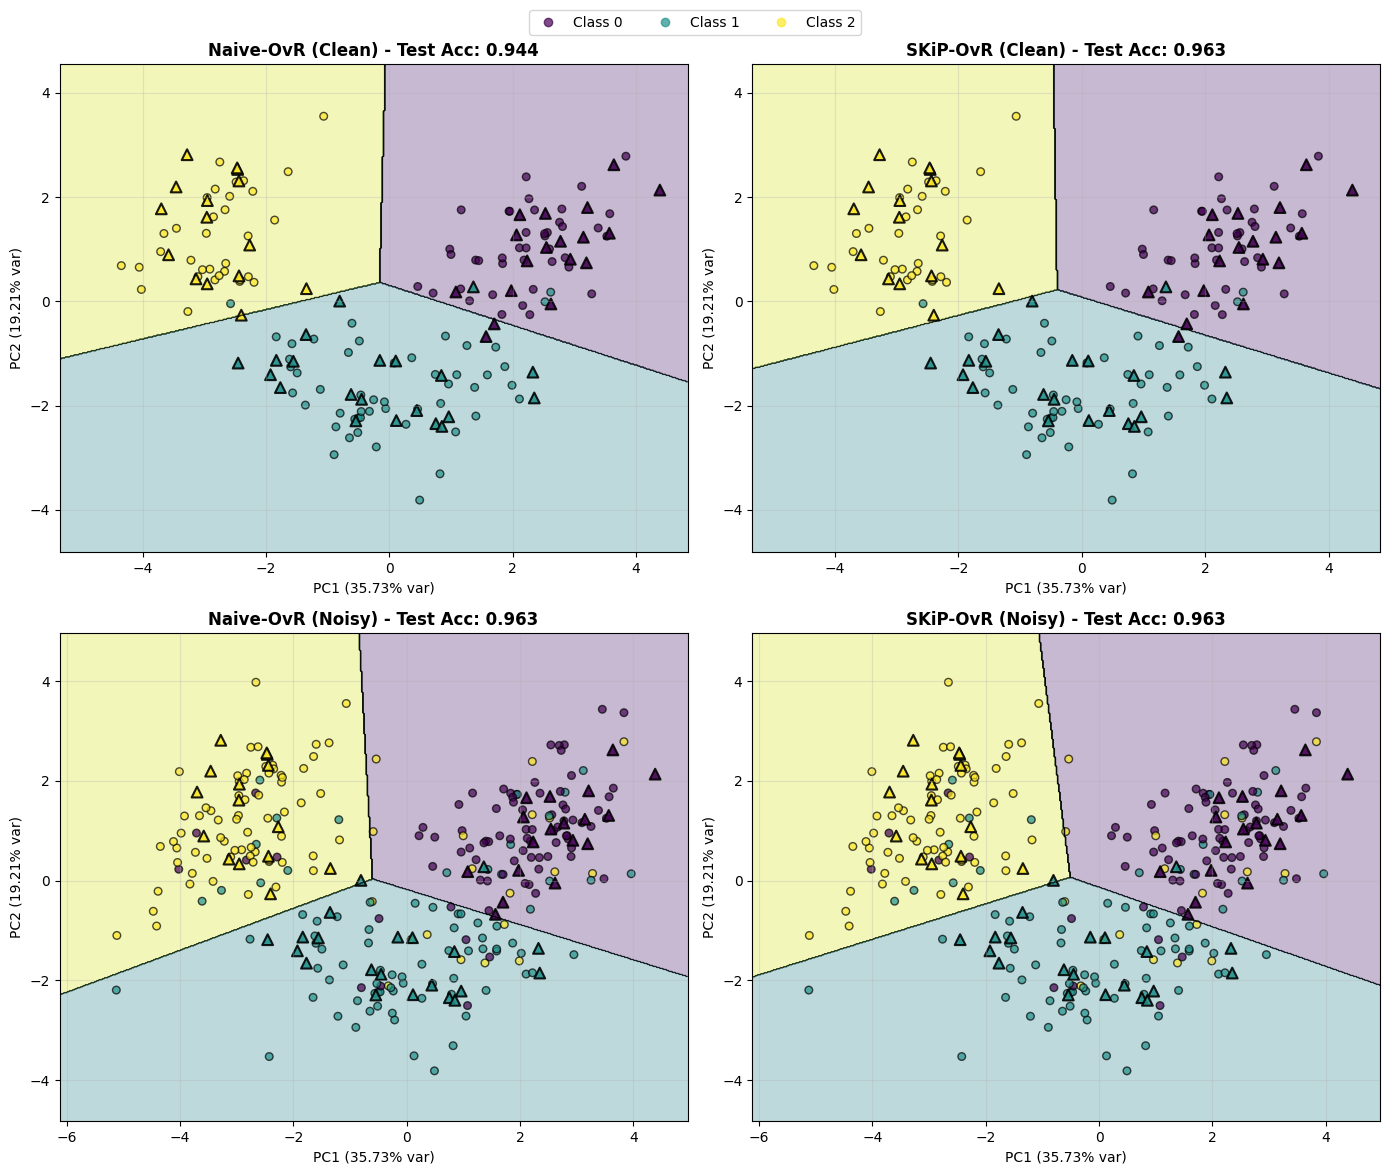


PCA Explained Variance: 54.94% (PC1: 35.73%, PC2: 19.21%)


In [25]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_noisy_train_pca = pca.transform(X_noisy_train)

# Train models on 2D PCA data
models_pca = []

# Clean data models
clf_naive_pca = OneVsRestSVM(NaiveSVM(C=1.0, fit_intercept=True))
clf_naive_pca.fit(X_train_pca, y_train)
models_pca.append(('Naive-OvR', clf_naive_pca, X_train_pca, y_train, 'Clean'))

clf_skip_pca = OneVsRestSVM(SKiP(C=1.0, fit_intercept=True, k=5))
clf_skip_pca.fit(X_train_pca, y_train)
models_pca.append(('SKiP-OvR', clf_skip_pca, X_train_pca, y_train, 'Clean'))

# Noisy data models
clf_naive_pca_noisy = OneVsRestSVM(NaiveSVM(C=1.0, fit_intercept=True))
clf_naive_pca_noisy.fit(X_noisy_train_pca, y_noisy_train)
models_pca.append(('Naive-OvR', clf_naive_pca_noisy, X_noisy_train_pca, y_noisy_train, 'Noisy'))

clf_skip_pca_noisy = OneVsRestSVM(SKiP(C=1.0, fit_intercept=True, k=5))
clf_skip_pca_noisy.fit(X_noisy_train_pca, y_noisy_train)
models_pca.append(('SKiP-OvR', clf_skip_pca_noisy, X_noisy_train_pca, y_noisy_train, 'Noisy'))

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (name, clf, X_tr, y_tr, data_type) in enumerate(models_pca):
    ax = axes[idx]
    
    # Create mesh
    h = 0.02
    x_min, x_max = X_tr[:, 0].min() - 1, X_tr[:, 0].max() + 1
    y_min, y_max = X_tr[:, 1].min() - 1, X_tr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Plot training data
    scatter = ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, s=30, 
                        cmap='viridis', edgecolors='k', alpha=0.7)
    
    # Plot test data
    ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, 
              s=60, marker='^', cmap='viridis', edgecolors='k', linewidths=1.5, alpha=0.9)
    
    test_acc = (clf.predict(X_test_pca) == y_test).mean()
    ax.set_title(f'{name} ({data_type}) - Test Acc: {test_acc:.3f}', 
                fontsize=12, fontweight='bold')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} var)', fontsize=10)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} var)', fontsize=10)
    ax.grid(alpha=0.3)

# Add legend
handles, labels = scatter.legend_elements()
fig.legend(handles, [f'Class {i}' for i in range(3)], 
          loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"\nPCA Explained Variance: {pca.explained_variance_ratio_.sum():.2%} (PC1: {pca.explained_variance_ratio_[0]:.2%}, PC2: {pca.explained_variance_ratio_[1]:.2%})")